## Import

In [3]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.image import imread # widthxhxc
import numpy as np
import statsmodels.formula.api as smf
from decimal import Decimal
import math
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score

## Data

In [4]:
from sklearn.neural_network import MLPClassifier 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [5]:
test = pd.read_csv("../kaggleData/test.csv")
train = pd.read_csv("../kaggleData/train.csv")

In [6]:
X, y = make_classification(n_samples=100, random_state=1)

y.shape

(100,)

In [8]:
fullX = train.iloc[:, 1:] # get all row for every other column
fullY = train.iloc[:, :1] # get every row for label

In [9]:
length = fullX.shape[0]

In [10]:
XShape = np.array(fullX.iloc[:, :]).reshape((length,784))

In [11]:
YShape = np.array(fullY.iloc[:, :]).reshape(length)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(XShape, YShape, 
                                            stratify=YShape, random_state=1)

In [10]:
# This is from following 
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 
clf = MLPClassifier(hidden_layer_sizes=(),
                    activation= 'relu', 
                    random_state=1, 
                    max_iter=300).fit(X_train, y_train)

In [11]:
# What our model should predict
y_test

array([5, 4, 8, ..., 5, 6, 9], dtype=int64)

In [12]:
# What our model ACTUALLY predicts
allTests = clf.predict(X_test[:, :])
allTests

array([3, 4, 8, ..., 8, 6, 9], dtype=int64)

In [13]:
accuracy = clf.score(X_test, y_test)

accuracy

0.8873333333333333

In [14]:
def predictNumber(number):
    plt.matshow(np.array(X_test[number]).reshape((28,28)), cmap="binary_r")
    plt.title(f"Actual: {y_test[number]} \n Predict: {allTests[number]}\n")
    plt.show()

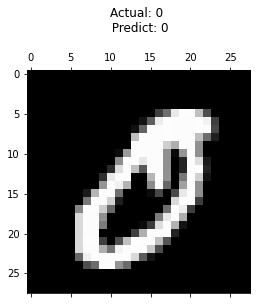

In [15]:
predictNumber(14)

<Figure size 2880x2880 with 0 Axes>

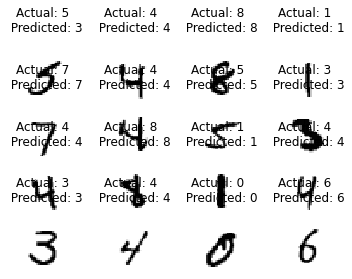

In [16]:
byX = 4
byY = 4
plt.figure(figsize=(40,40))
fig, axs = plt.subplots(byX, byY)


xAxis = 0
yAxis = 0
rangeMax = byY * byX

for i in range(0,rangeMax):
    y_pred = allTests[i]
    
    axs[xAxis, yAxis].matshow(np.array(X_test[i]).reshape((28,28)), cmap="binary")
    axs[xAxis, yAxis].axis("off")
    axs[xAxis, yAxis].set_title(f"Actual: {y_test[i]} \n Predicted: {y_pred}")
    yAxis += 1
    if (yAxis >= byY):
        yAxis = 0
        xAxis += 1

## Playing with Hidden Layers

In [17]:
# This is from following 
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 
hiddenModel = MLPClassifier(hidden_layer_sizes=(20,),
                    activation= 'relu', 
                    random_state=1, 
                    max_iter=1000).fit(X_train, y_train)

In [18]:
y_test

array([5, 4, 8, ..., 5, 6, 9], dtype=int64)

In [19]:
# What our model ACTUALLY predicts
allTests2 = hiddenModel.predict(X_test[:, :])
allTests2

array([5, 4, 8, ..., 8, 4, 9], dtype=int64)

In [20]:
accuracy = hiddenModel.score(X_train, y_train)

accuracy

## 95 or 97 is the goal 
## sklearn are simplistic :( not effective for images 

0.9636825396825397

In [21]:
accuracy = hiddenModel.score(X_test, y_test)

accuracy

0.9085714285714286

In [ ]:
def predictNumber2(number):
    plt.matshow(np.array(X_test[number]).reshape((28,28)), cmap="binary_r")
    plt.title(f"Actual: {y_test[number]} \n Predict: {allTests2[number]}\n")
    plt.show()

## Finding Optimal Hidden layers

create chart to find best performing hidden layers

In [22]:
def hiddenLayerFunction(n):
    m = MLPClassifier(hidden_layer_sizes=n,
                    activation= 'relu', 
                    random_state=1, 
                    max_iter=1000).fit(X_train, y_train)
    trainAccuracy = m.score(X_train, y_train)
    testAccuracy = m.score(X_test, y_test)
    return (trainAccuracy, testAccuracy)

In [23]:
numbers = [1,50,100,500]

In [25]:
tupleNumbers = [(50,50),(100,100)]

In [26]:
data = {'tuple': [],
    'train Accuracy': [],
    'test Accuracy': []}
numbers_full_data = pd.DataFrame(data)

for i in tupleNumbers:
    print(i)
    results = hiddenLayerFunction(i)
    new_row = {'tuple':i, 'train Accuracy':results[0], 'test Accuracy':results[1]}
    numbers_full_data = numbers_full_data.append(new_row, ignore_index=True)
    
print(numbers_full_data)

(50, 50)
(100, 100)
        tuple  train Accuracy  test Accuracy
0    (50, 50)        0.997270       0.954476
1  (100, 100)        0.996571       0.961524


In [31]:
numbers_data = numbers_full_data.iloc[0:4, :]
numbers_data

,tuple,train Accuracy,test Accuracy
0,1.0,0.319556,0.313048
1,50.0,0.990794,0.944190
2,100.0,0.997905,0.965905
3,500.0,0.991524,0.963810


In [28]:
twohundo = hiddenLayerFunction((200,200))
twohundo

(0.9907936507936508, 0.9583809523809523)

In [32]:
plotx = numbers_data["tuple"]
ploty1 = numbers_data["train Accuracy"]
ploty2 = numbers_data["test Accuracy"]

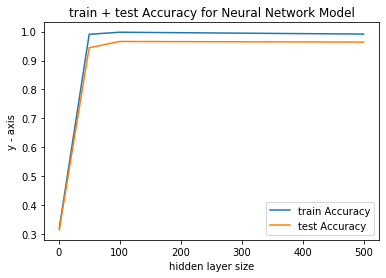

In [33]:
plt.plot(plotx, ploty1, label = "train Accuracy")
plt.plot(plotx, ploty2, label = "test Accuracy")
plt.xlabel('hidden layer size')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('train + test Accuracy for Neural Network Model')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [85]:
hiddenLayerFunction((500,500,500))

(1.0, 0.72)

In [92]:
hiddenLayerFunction((41))

(0.9626666666666667, 0.6)

## EXAMPLE FROM LAB

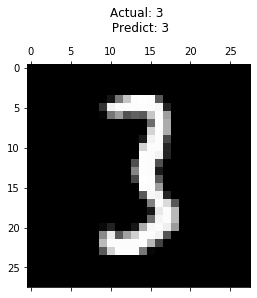

In [77]:
predictNumber2(90)

In [21]:
m = MLPClassifier(hidden_layer_sizes = (5,),
    activation="relu", alpha=0.001,
    tol=1e-6, max_iter=1000).fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'X2')

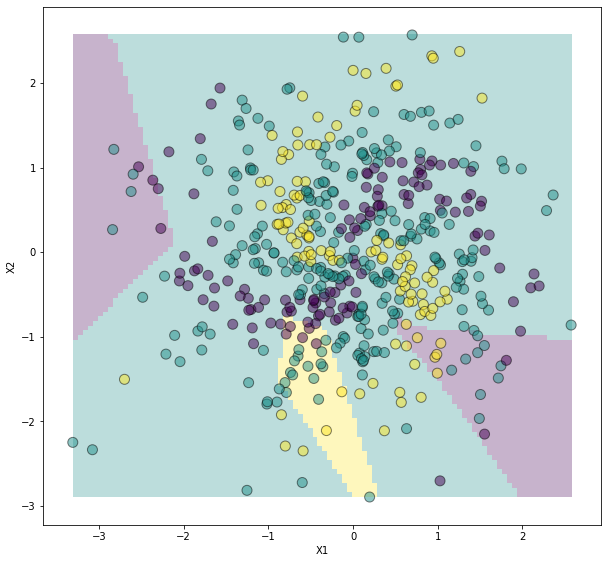

In [22]:
range1 = np.linspace(X[:,0].min(), X[:,0].max(), 100) 
range2 = np.linspace(X[:,1].min(), X[:,1].max(), 100) 
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel())) 
yhat = m.predict(Xgrid)
plt.figure(figsize=(10,10))
## plot the predicted values on grid as an image 
plt.imshow(yhat.reshape((100,100)),
        alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()]) ## add the actual values
plt.scatter(X[:,0], X[:,1], c=y, s=100, alpha=0.5, edgecolor="k") 
plt.xlabel("X1")
plt.ylabel("X2")